In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train,y_train) , (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_train[0]


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
X_train[0].shape

(32, 32, 3)

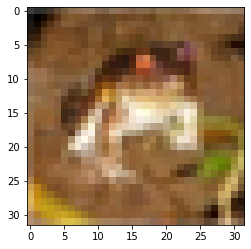

In [7]:
plt.imshow(X_train[0])

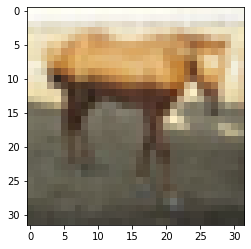

In [8]:
plt.imshow(X_train[2000])

In [9]:
X_train = X_train[:50000]/255.0
X_test = X_test[:50000]/255.0

In [10]:
X_train.shape,X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

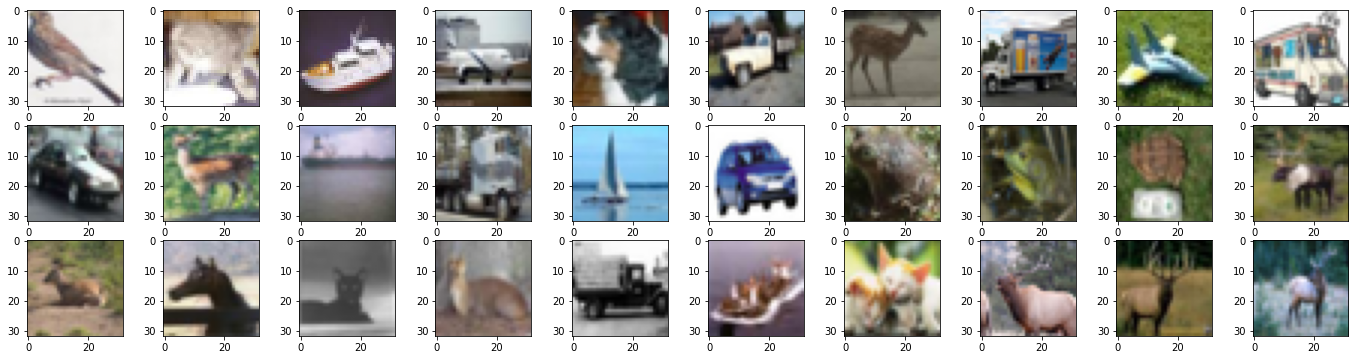

In [11]:
randInt = np.random.randint(0,X_train.shape[0]-1,30)
_,axs=plt.subplots(nrows=3,ncols=10,figsize=(24,6))
for i, ax in enumerate(axs.flat):
    ax.imshow(X_train[randInt[i]].squeeze())
plt.show()

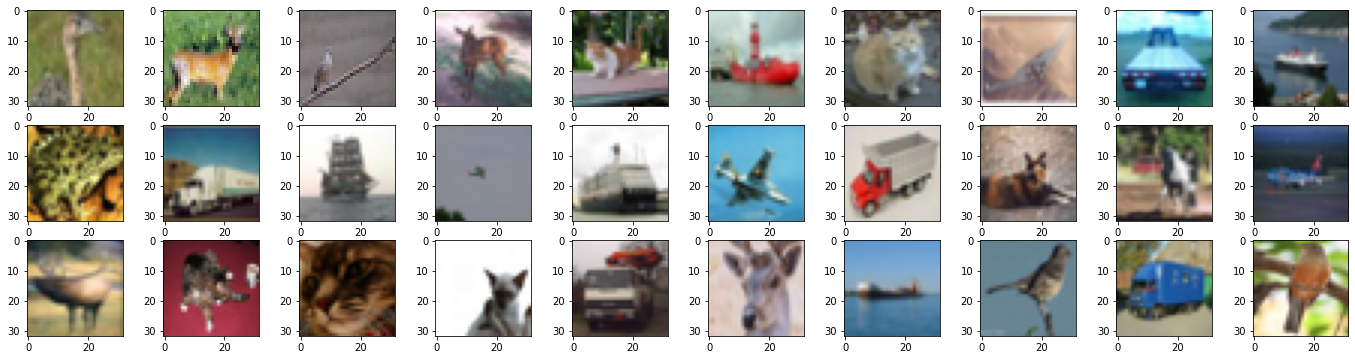

In [12]:
randInt = np.random.randint(0,X_test.shape[0]-1,30)
_,axs=plt.subplots(nrows=3,ncols=10,figsize=(24,6))
for i, ax in enumerate(axs.flat):
    ax.imshow(X_test[randInt[i]].squeeze())
plt.show()

In [13]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [14]:
y_train.shape,y_test.shape

((50000, 10), (10000, 10))

In [15]:
from tensorflow.keras.models import Sequential

In [16]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [17]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))

model.add(Dense(10, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [18]:
#from tensorflow.keras.callbacks import EarlyStopping

In [19]:
#early_stop = EarlyStopping(monitor = "val_loss", patience = 2)

In [32]:
model.fit(X_train, y_train, validation_data = (X_test, y_test),  epochs = 10)
#, callbacks = [early_stop]
#model.fit(np.array(X_train), np.array(y_train), verbose=0, epochs=100,callbacks = [early_stop])

Epoch 1/10
1563/1563 [==============================] - 90s 58ms/step - loss: 0.2349 - accuracy: 0.9167 - val_loss: 1.4917 - val_accuracy: 0.6707
Epoch 2/10
1563/1563 [==============================] - 94s 60ms/step - loss: 0.1996 - accuracy: 0.9307 - val_loss: 1.6522 - val_accuracy: 0.6685
Epoch 3/10
1563/1563 [==============================] - 119s 76ms/step - loss: 0.1881 - accuracy: 0.9347 - val_loss: 1.6627 - val_accuracy: 0.6719
Epoch 4/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.1692 - accuracy: 0.9412 - val_loss: 1.8297 - val_accuracy: 0.6571
Epoch 5/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.1593 - accuracy: 0.9454 - val_loss: 1.8094 - val_accuracy: 0.6681
Epoch 6/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.1469 - accuracy: 0.9506 - val_loss: 1.8882 - val_accuracy: 0.6664
Epoch 7/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.1352 - accuracy: 0.9540 - val_loss: 1.9104 

In [33]:
metrics = pd.DataFrame(model.history.history)

In [34]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.234928,0.91666,1.491733,0.6707
1,0.199586,0.93068,1.652163,0.6685
2,0.188110,0.93470,1.662735,0.6719
3,0.169199,0.94124,1.829688,0.6571
4,0.159289,0.94540,1.809415,0.6681
5,0.146858,0.95058,1.888216,0.6664
6,0.135154,0.95398,1.910353,0.6653
7,0.128708,0.95574,1.997303,0.6630
8,0.126271,0.95670,2.011368,0.6624
9,0.118688,0.96044,2.153131,0.6689


In [35]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

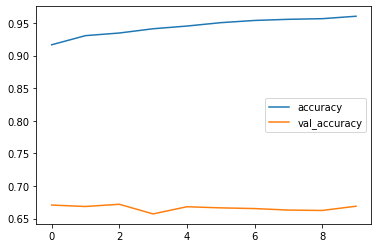

In [36]:
metrics[["accuracy", "val_accuracy"]].plot()

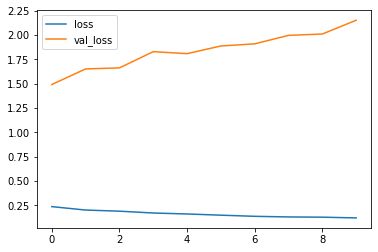

In [37]:
metrics[["loss", "val_loss"]].plot()

In [38]:
model.evaluate(X_test, y_test, verbose = 1)

313/313 [==============================] - 5s 16ms/step - loss: 2.1531 - accuracy: 0.6689


[2.1531307697296143, 0.6689000129699707]

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)


313/313 [==============================] - 5s 16ms/step


In [58]:
#print(classification_report(y_test, classes_x))

In [59]:
#import seaborn as sns
#plt.figure(figsize = (10, 6))
#sns.heatmap(confusion_matrix(y_test, classes_x), annot = True)

In [60]:
my_image = X_test[0]

In [61]:
my_image

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

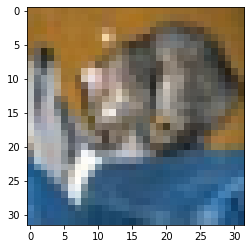

In [62]:
plt.imshow(my_image)

In [63]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [64]:
model.predict(my_image.reshape(1, 32, 32, 3))

1/1 [==============================] - 0s 22ms/step


array([[8.6954907e-07, 3.2868520e-08, 2.0024793e-04, 5.6295168e-01,
        5.8048416e-04, 2.1700068e-01, 2.1912791e-01, 1.1907244e-06,
        1.0602570e-04, 3.0860854e-05]], dtype=float32)

In [65]:
classes_x = [
    "Airplane",
    "Automobile",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck",
]

In [66]:
true_y = np.argmax(y_test,axis=1)
true_y

array([3, 8, 8, ..., 5, 1, 7])

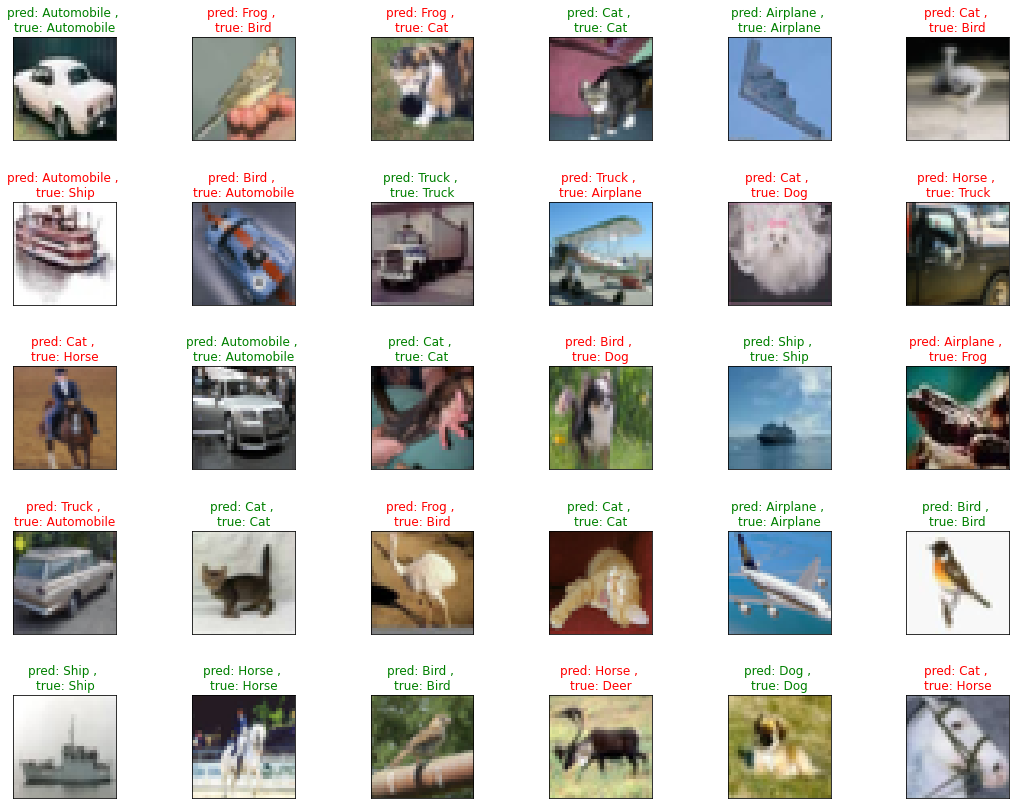

In [67]:
randInt = np.random.randint(0,X_test.shape[0]-1,30)
_,axs=plt.subplots(nrows=5,ncols=6,figsize=(24,14))
plt.subplots_adjust(wspace=-0.6, hspace=0.6)
for i, ax in enumerate(axs.flat):
    ax.imshow(X_test[randInt[i]].squeeze())

    if pred[randInt[i]] == true_y[randInt[i]]:
        ax.set_title( f"pred: {classes_x[pred[randInt[i]]]} , \ntrue: {classes_x[true_y[randInt[i]]]}" ,fontdict={"color":"green"})
    else: 
        ax.set_title( f"pred: {classes_x[pred[randInt[i]]]} , \ntrue: {classes_x[true_y[randInt[i]]]}" ,fontdict={"color":"red"})
    ax.set_xticks([])
    ax.set_yticks([])     
    
plt.show()